# Aula 01

- Objetivo
    - Ver o conteúdo praticar e responder as perguntas
- Perguntas do CO
    1. Quantas casas estão disponíveis para compra?
    2. Quantos atributos as casas possuem?
    3. Quais são os atributos das casas?
    4. Qual a casa mais cara ( casa com o maior valor de venda )?
    5. Qual a casa com o maior número de quartos?

## 1.0 - Importando Bibliotecas

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 2.0 - Coleta de dados

In [3]:
df_house_rocket = pd.read_csv('/home/diegopmayer/Documents/projects/python/pr001_python_zero_ds/dataset/kc_house_data.csv')

## 3.0 - Análise Descritiva

### 3.1 - NaN - Valores Nulos ou None a number

In [53]:
df_house_rocket.isnull().sum().sum(), df_house_rocket.isna().sum().sum()

(0, 0)

### 3.2 - Datatype

In [69]:
dtype = ['int64','object','float64','int64','float64','int64','int64',
         'float64','int64','int64','int64','int64','int64','int64',
         'int64','int64','int64','float64','float64','int64','int64']

df_dtype = df_house_rocket.tail(3).T
df_dtype['dtype'] = dtype
df_dtype

,21610,21611,21612,dtype
id,1523300141,291310100,1523300157,int64
date,20140623T000000,20150116T000000,20141015T000000,object
price,402101.0,400000.0,325000.0,float64
bedrooms,2,3,2,int64
bathrooms,0.75,2.5,0.75,float64
sqft_living,1020,1600,1020,int64
sqft_lot,1350,2388,1076,int64
floors,2.0,2.0,2.0,float64
waterfront,0,0,0,int64
view,0,0,0,int64


In [70]:
# date
# objeto para formato data "datetime"
df_house_rocket['date'] = df_house_rocket['date'].astype('datetime64[ns]').copy()

### 3.3 - Estatística descritiva

In [192]:
# análise descritiva dos dados "eliminando o id"
df_house_rocket.drop('id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


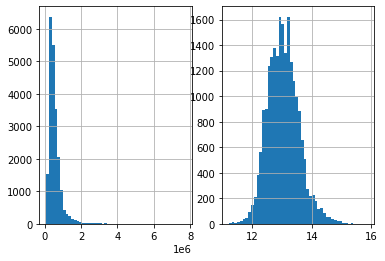

In [232]:
grid = plt.GridSpec(1, 2)

plt.subplot(grid[0,0]);
df_house_rocket['price'].hist(bins=50);

plt.subplot(grid[0,1]);
np.log(df_house_rocket['price']).hist(bins=50);


## 3.0 - Análise Exploratória

In [237]:
# 1. Quantas casas estão disponíveis para compra?
    # R: 21436

# Quantidades de registros e quantidade de registros duplicados
print(f'     Total de registros: {df_house_rocket.shape[0]}')
print(f'Total de IDs duplicados: {df_house_rocket["id"].duplicated().sum()}')

# 21613 casas disponíveis para venda, porém, existem id duplicados, então teremos 21613 - 177 duplicados 
print(f' Total real de casas disponíveis: {df_house_rocket.shape[0] - df_house_rocket["id"].duplicated().sum()}')

     Total de registros: 21613
Total de IDs duplicados: 177
 Total real de casas disponíveis: 21436


In [238]:
# 2. Quantos atributos as casas possuem? como não foi explicito, consideramos o id.
    # R: 21
df_house_rocket.shape[1]

21

In [239]:
# 3. Quais são os atributos das casas?
#     - R: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
#       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#       'lat', 'long', 'sqft_living15', 'sqft_lot15']

df_house_rocket.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [249]:
# 4. Qual a casa mais cara ( casa com o maior valor de venda )?
#     - R: id: 6762700020 | 7.700.000,00
df_house_rocket[df_house_rocket['price'] == df_house_rocket['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [248]:
# 5. Qual a casa com o maior número de quartos?
#     - R: id= 2402100895 com 33 quartos
df_house_rocket[df_house_rocket['bedrooms'] == df_house_rocket['bedrooms'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


## 4.0 - Entrega

1. Quantas casas estão disponíveis para compra?
    - R: **21436** casas
2. Quantos atributos as casas possuem?
    - R: **21** atributos das casas
3. Quais são os atributos das casas?
    - R: 
         - 'id'
         - 'date' 
         - 'price'
         - 'bedrooms'
         - 'bathrooms'
         - 'sqft_living',
         - 'sqft_lot'
         - 'floors'
         - 'waterfront'
         - 'view'
         - 'condition'
         - 'grade',
         - 'sqft_above'
         - 'sqft_basement'
         - 'yr_built'
         - 'yr_renovated'
         - 'zipcode',
         - 'lat'
         - 'long'
         - 'sqft_living15'
         - 'sqft_lot15'
4. Qual a casa mais cara ( casa com o maior valor de venda )?
    - R: id = **6762700020** no valor de **7.700.000,00**
5. Qual a casa com o maior número de quartos?
    - R: id = id **2402100895** com **33** quartos

## 5.0 - Novas perguntas como exercício

1. Quantas casas estão disponíveis para compra?
2. Quantos atributos as casas possuem?
3. Quais são os atributos das casas?
4. Qual a casa mais cara ( casa com o maior valor de venda )?
5. Qual a casa com o maior número de quartos?
6. Qual a soma total de quartos do conjunto de dados?
7. Quantas casas possuem 2 banheiros?
8. Qual o preço médio de todas as casas no conjunto de dados?
9. Qual o preço médio de casas com 2 banheiros?
10. Qual o preço mínimo entre as casas com 3 quartos?
11. Quantas casas possuem mais de 300 metros quadrados na sala de estar?
12. Quantas casas tem mais de 2 andares?
13. Quantas casas tem vista para o mar?
14. Das casas com vista para o mar, quantas tem 3 quartos?
15. Das casas com mais de 300 metros quadrados de sala de estar, quantas tem mais de 2 banheiros?